# Problem Statement:

##### Classification of Loan Status using dataset containing loan id, gender classification, etc.

##### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

## Part 1 - Data Exploration and Pre-Processing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Naive_Bayes\P8_Classification_Loan_Status\Python_Project_7_Nai.csv")
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


#### 2 - Checking the null values

In [3]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

#### 3 - Printing the column names

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

#### 4 - Creating list of all columns that contain null values

In [5]:
null_list = []
for col in df:
    if df[col].isnull().sum() != 0:
        null_list.append(col)
print("Columns with the Null Values in the dataset: ",null_list)

Columns with the Null Values in the dataset:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


#### 5 - Fill all the null values with mean using for loop

In [6]:
for col in df:
    if df[col].isnull().sum() != 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

#### 6 - Getting Data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


#### 7 - Describing the Data

In [8]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


#### 8 - Displaying the boxplot for LIMIT_BAL

In [9]:
df.loc[df['LIMIT_BAL']==32768]

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
12525,12526,32768.0,42,34411.0,336175.0,33348.0,27725.0,256365.0,2436.0,11219.0,11461.0,91.0,8345.0,7783.0,92.0,Default


In [10]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].drop(index=12525, axis=0)

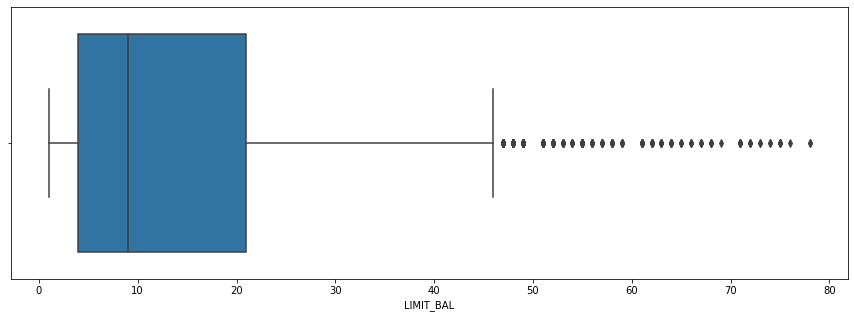

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.LIMIT_BAL);

#### 9 - Displaying Box Plot for Age

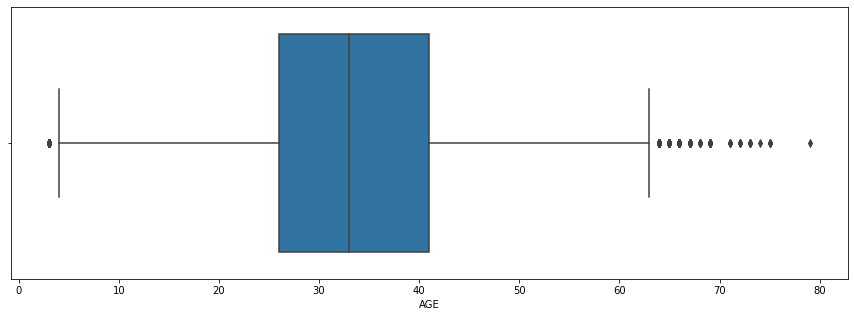

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.AGE);

#### 10 - Droping all the null values

In [13]:
df.dropna(inplace=True)

#### 11 - Performing Encoding on the Default Status Column

In [14]:
enc = LabelEncoder()

For Better accuracy of the model we will encode all columns instead of just one column

In [15]:
for col in df:
    df[col] = enc.fit_transform(df[col])

# Part - 2 Working with the Models

#### 1 - Creating Feature and Target Data for the Model

In [16]:
X = df.drop('Default Status', axis=1)
y = df[['Default Status']]

#### 2 - Spliting data into Training and Testing Datasets

#### 3 - Fitting Guassian Naive Bayes Classifier to the Model

Trying to find best test_score for better accuracy

In [17]:
model = GaussianNB()

In [18]:
import warnings
warnings.filterwarnings("ignore")

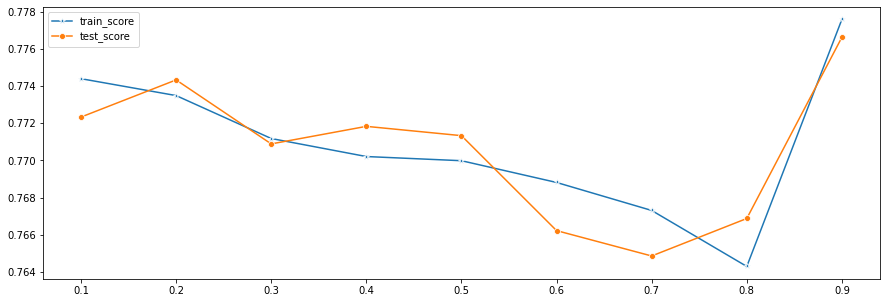

In [19]:
tr_score=[]
ts_score=[]
for i in np.arange(0.1,1,0.1):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,random_state=6)
    model.fit(X_train,y_train)
    tr_score.append(model.score(X_train,y_train))
    ts_score.append(model.score(X_test,y_test))

plt.figure(figsize=(15,5))
q = sns.lineplot(np.arange(0.1,1,0.1),tr_score,marker='*',label='train_score')
q = sns.lineplot(np.arange(0.1,1,0.1),ts_score,marker='o',label='test_score')

We can see from the graph that keeping test size at 0.9 yields best accuracy so we will go with that

#### 4 - Defining Function for the Precision score,Accuracy Score,Recall Score,Confusion Matrix,Classification Report

In [20]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,classification_report

In [21]:
def get_score(model,X_train,X_test,y_train,y_test):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9,random_state=6)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Precision Score: ", precision_score(y_test,y_pred))
    print("")
    print("Accuracy Score: ", accuracy_score(y_test,y_pred))
    print("")
    print("Recall Score: ", recall_score(y_test,y_pred))
    print("")
    print(classification_report(y_test,y_pred,digits=5))
    print("")
    print(confusion_matrix(y_test,y_pred))

In [22]:
get_score(model,X_train,X_test,y_train,y_test)

Precision Score:  0.7788232668848557

Accuracy Score:  0.7766296296296297

Recall Score:  0.9960047562425683

              precision    recall  f1-score   support

           0    0.25000   0.00469   0.00920      5975
           1    0.77882   0.99600   0.87413     21025

    accuracy                        0.77663     27000
   macro avg    0.51441   0.50035   0.44166     27000
weighted avg    0.66180   0.77663   0.68272     27000


[[   28  5947]
 [   84 20941]]
